In [2]:
import os
import sys
from time import time
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
!pip install --upgrade pandas


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
input_dir = r'C:/Users/User/Desktop/Inattention_detection/DGW\openface_prototype_program\test_faces_path'
output_dir = r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output'
my_face_dir = r'D:\User\Pictures\temp'

In [7]:
def extract_openface_features(dirname, outdir):
    for filename in os.listdir(dirname):
        start = time()
        command = 'C:/Users/User/Downloads/OpenFace_2.2.0_win_x64/OpenFace_2.2.0_win_x64/FeatureExtraction.exe -out_dir ' + outdir
        
        command += ' -fdir ' + dirname
        print(command)
        os.system(command=command)
        print(filename, '-', time() - start)

In [13]:
"/".join(train_annotation['Кадр'][0].split('/')[-2:])

'7/Sub56_vid1_frame186.png'

In [15]:
def extract_dgw_features(annotation, folder, out_dir):
    for kaggle_img_path in tqdm(annotation['Кадр']):
        img_path = folder + '/' + "/".join(kaggle_img_path.split('/')[-2:])
        command = 'C:/Users/User/Downloads/OpenFace_2.2.0_win_x64/OpenFace_2.2.0_win_x64/FaceLandmarkImg.exe -2Dfp -3Dfp -pdmparams -pose -aus -gaze -out_dir ' + out_dir
        
        command += ' -f ' + img_path

        os.system(command=command)

In [4]:
train_out_dir = r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output\train'
val_out_dir = r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output\val'
test_out_dir = r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output\test'

train_dir = r'D:\DGW\dgw\train'
val_dir = r'D:\DGW\dgw\val'

train_annotation = pd.read_pickle(r"D:\DGW\dgw\dgw_train_faces_annotation")
val_annotation = pd.read_pickle(r"D:\DGW\dgw\dgw_val_faces_annotation")
test_annotation = pd.read_pickle(r"D:\DGW\dgw\dgw_test_faces_annotation")

In [32]:
extract_dgw_features(train_annotation, train_dir, train_out_dir)

100%|██████████| 21763/21763 [9:14:26<00:00,  1.53s/it]  


In [17]:
extract_dgw_features(val_annotation, val_dir, val_out_dir)

100%|██████████| 9994/9994 [3:57:33<00:00,  1.43s/it]  


In [16]:
extract_dgw_features(test_annotation, train_dir, test_out_dir)

100%|██████████| 7674/7674 [3:05:18<00:00,  1.45s/it]  


In [57]:
train_files = []
val_files = []
test_files = []

for filename in os.listdir(train_out_dir):
    if filename[-3:] == 'csv':
        train_files.append(filename[:-4])

for filename in os.listdir(val_out_dir):
    if filename[-3:] == 'csv':
        val_files.append(filename[:-4])

for filename in os.listdir(test_out_dir):
    if filename[-3:] == 'csv':
        test_files.append(filename[:-4])

In [82]:
# файлы, которые есть в аннотации, и из которых openface не извлекло признаки
# 454 в train
train_not_processed_files = set(train_annotation['Кадр'].apply(lambda x: x.split('/')[-1][:-4]).values) - set(train_files) 

In [84]:
# 204 в val
val_not_processed_files = set(val_annotation['Кадр'].apply(lambda x: x.split('/')[-1][:-4]).values) - set(val_files)

In [85]:
# 171 в test
test_not_processed_files = set(test_annotation['Кадр'].apply(lambda x: x.split('/')[-1][:-4]).values) - set(test_files)

In [63]:
for i in train_annotation['Кадр']:
    if 'Sub43_vid1\ufeff_frame113' in i:
        print(i)

/kaggle/input/driver-gaze-in-the-wild/dgw_faces/dgw_faces/train_faces/4/Sub43_vid1﻿_frame113.png


In [55]:
for i in train_annotation['Кадр']:
    if 'Video5_sub3_frame657' in i:
        print(i)

/kaggle/input/driver-gaze-in-the-wild/dgw_faces/dgw_faces/train_faces/7/Video5_sub3_frame657.png


In [64]:
# удаление странного знака из названий файлов - знак мешает извлечению признаков
for dirpath,_,filenames in os.walk(train_dir):
    for f in filenames:
        frame_abs_path = os.path.abspath(os.path.join(dirpath, f))
        os.rename(frame_abs_path, frame_abs_path.replace('\ufeff', ''))

In [67]:
train_annotation['Кадр'] = train_annotation['Кадр'].apply(lambda x: x.replace('\ufeff', ''))

In [86]:
with open(r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program/train_not_processed_frames', 'wb') as handle:
    pickle.dump(train_not_processed_files, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program/val_not_processed_frames', 'wb') as handle:
    pickle.dump(val_not_processed_files, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program/test_not_processed_frames', 'wb') as handle:
    pickle.dump(test_not_processed_files, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
set(train_annotation['Кадр'].apply(lambda x: x.split('/')[-1][:-4]).values) - set(train_files)

{'Sub255_1_frame499',
 'Sub255_1_frame501',
 'Sub255_1_frame503',
 'Sub43_vid1_frame114',
 'Sub43_vid1_frame115',
 'Sub43_vid1_frame116',
 'Sub43_vid1_frame117',
 'Sub43_vid1_frame118',
 'Sub43_vid1_frame119',
 'Sub43_vid1_frame120',
 'Sub43_vid1_frame121',
 'Sub43_vid1_frame139',
 'Sub43_vid1_frame140',
 'Sub43_vid1_frame141',
 'Sub43_vid1_frame142',
 'Sub43_vid1_frame143',
 'Sub43_vid1_frame144',
 'Sub43_vid1_frame145',
 'Sub43_vid1_frame146',
 'Sub43_vid1_frame147',
 'Sub43_vid1_frame166',
 'Sub43_vid1_frame167',
 'Sub43_vid1_frame168',
 'Sub43_vid1_frame169',
 'Sub43_vid1_frame170',
 'Sub43_vid1_frame171',
 'Sub43_vid1_frame172',
 'Sub43_vid1_frame173',
 'Sub43_vid1_frame174',
 'Sub43_vid1_frame175',
 'Sub43_vid1_frame176',
 'Sub43_vid1_frame177',
 'Sub43_vid1_frame193',
 'Sub43_vid1_frame194',
 'Sub43_vid1_frame195',
 'Sub43_vid1_frame196',
 'Sub43_vid1_frame197',
 'Sub43_vid1_frame198',
 'Sub43_vid1_frame199',
 'Sub43_vid1_frame200',
 'Sub43_vid1_frame201',
 'Sub43_vid1_frame202'

In [73]:
for i in train_files:
    if 'Sub43_vid1_frame114' in i:
        print(i)

In [ ]:
‪D:\DGW\dgw\train\4\Sub43_vid1_frame114.png

In [9]:
extract_openface_features(input_dir, output_dir)

C:/Users/User/Downloads/OpenFace_2.2.0_win_x64/OpenFace_2.2.0_win_x64/FeatureExtraction.exe -out_dir C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output -fdir C:/Users/User/Desktop/Inattention_detection/DGW\openface_prototype_program\test_faces_path
Sub27_vid_1_frame165.png - 1.4830553531646729
C:/Users/User/Downloads/OpenFace_2.2.0_win_x64/OpenFace_2.2.0_win_x64/FeatureExtraction.exe -out_dir C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output -fdir C:/Users/User/Desktop/Inattention_detection/DGW\openface_prototype_program\test_faces_path
Sub27_vid_1_frame201.png - 1.5317833423614502
C:/Users/User/Downloads/OpenFace_2.2.0_win_x64/OpenFace_2.2.0_win_x64/FeatureExtraction.exe -out_dir C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output -fdir C:/Users/User/Desktop/Inattention_detection/DGW\openface_prototype_program\test_faces_path
Sub27_vid_1_frame23.png - 1.4540688991546

In [82]:
eye_data = pd.read_csv(r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\openface_output\test_faces_path.csv')
eye_data.columns = [col[1:] if i != 0 else col for i, col in enumerate(eye_data.columns)]
eye_data = eye_data[eye_data['frame'] == 4] \
    [['eye_lmk_x_8', 'eye_lmk_x_14', 'eye_lmk_y_11', 'eye_lmk_y_17', 'eye_lmk_x_36', 'eye_lmk_x_42', 'eye_lmk_y_39', 'eye_lmk_y_45', 
    'eye_lmk_y_8', 'eye_lmk_y_14', 'eye_lmk_x_11', 'eye_lmk_x_17', 'eye_lmk_y_36', 'eye_lmk_y_42', 'eye_lmk_x_39', 'eye_lmk_x_45']]

image = cv2.imread(r'C:\Users\User\Desktop\Inattention_detection\DGW\openface_prototype_program\test_faces_path\Sub27_vid_2_frame125.png')

In [83]:
eye_data

,eye_lmk_x_8,eye_lmk_x_14,eye_lmk_y_11,eye_lmk_y_17,eye_lmk_x_36,eye_lmk_x_42,eye_lmk_y_39,eye_lmk_y_45,eye_lmk_y_8,eye_lmk_y_14,eye_lmk_x_11,eye_lmk_x_17,eye_lmk_y_36,eye_lmk_y_42,eye_lmk_x_39,eye_lmk_x_45
3,437.1,464.7,198.4,209.2,504.0,524.7,189.2,198.1,207.3,202.3,452.7,453.4,196.3,193.9,517.6,519.7


In [84]:
face_points = [(int(eye_data['eye_lmk_x_8'].values), int(eye_data['eye_lmk_y_8'].values)),
            (int(eye_data['eye_lmk_x_14'].values), int(eye_data['eye_lmk_y_14'].values)),
            (int(eye_data['eye_lmk_x_11'].values), int(eye_data['eye_lmk_y_11'].values)),
            (int(eye_data['eye_lmk_x_17'].values), int(eye_data['eye_lmk_y_17'].values)),
            (int(eye_data['eye_lmk_x_42'].values), int(eye_data['eye_lmk_y_42'].values)),
            (int(eye_data['eye_lmk_x_36'].values), int(eye_data['eye_lmk_y_36'].values)),
            (int(eye_data['eye_lmk_x_39'].values), int(eye_data['eye_lmk_y_39'].values)),
            (int(eye_data['eye_lmk_x_45'].values), int(eye_data['eye_lmk_y_45'].values))]

In [85]:
for dot in face_points:
    print(dot)
    cv2.circle(image, dot, 3, (0,0,255), -1)

(437, 207)
(464, 202)
(452, 198)
(453, 209)
(524, 193)
(504, 196)
(517, 189)
(519, 198)


Text(0.5, 1.0, 'Image with bbox')

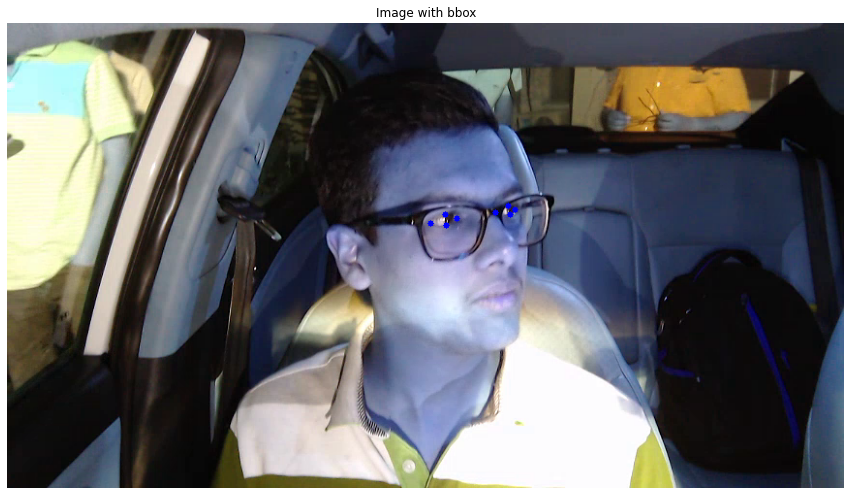

In [86]:
plt.figure(figsize = [15,10])
plt.imshow(image); plt.axis('off'); plt.title("Image with bbox")

In [ ]:
eye_lmk_ # left_eye  width - 8, 14

In [ ]:
'''
left_eye
    width - 8, 14 - x
    height - 11, 17 - y

right_eye
    width - 36, 42 - x
    height - 39, 45 - y
'''


In [25]:
front_frame_rad = [0.076, 0.030, 0.010]
right_frame_rad = [0.037, 0.572, 0.093]
coords = ['x', 'y', 'z']

In [26]:
for i, val in enumerate(front_frame_rad):
    print(coords[i], '-', math.degrees(val))

for i, val in enumerate(right_frame_rad):
    print(coords[i], '-', math.degrees(val))
    

x - 4.354479242994256
y - 1.7188733853924696
z - 0.5729577951308232
x - 2.1199438419840457
y - 32.77318588148309
z - 5.328507494716656
